In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [17]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [18]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [20]:
train_df.isnull().sum()

,0
id,0
age,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0
sleep_hours_per_day,0
screen_time_hours_per_day,0
bmi,0
waist_to_hip_ratio,0
systolic_bp,0


In [21]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,700000.0,NaN,NaN,NaN,349999.5,202072.738554,0.0,174999.75,349999.5,524999.25,699999.0
age,700000.0,NaN,NaN,NaN,50.359734,11.65552,19.0,42.0,50.0,58.0,89.0
alcohol_consumption_per_week,700000.0,NaN,NaN,NaN,2.072411,1.048189,1.0,1.0,2.0,3.0,9.0
physical_activity_minutes_per_week,700000.0,NaN,NaN,NaN,80.230803,51.195071,1.0,49.0,71.0,96.0,747.0
diet_score,700000.0,NaN,NaN,NaN,5.963695,1.463336,0.1,5.0,6.0,7.0,9.9
sleep_hours_per_day,700000.0,NaN,NaN,NaN,7.0022,0.901907,3.1,6.4,7.0,7.6,9.9
screen_time_hours_per_day,700000.0,NaN,NaN,NaN,6.012733,2.022707,0.6,4.6,6.0,7.4,16.5
bmi,700000.0,NaN,NaN,NaN,25.874684,2.860705,15.1,23.9,25.9,27.8,38.4
waist_to_hip_ratio,700000.0,NaN,NaN,NaN,0.858766,0.03798,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,NaN,NaN,NaN,116.294193,11.01039,91.0,108.0,116.0,124.0,163.0


In [22]:
train_df['diagnosed_diabetes'].isna().sum()

np.int64(0)

In [23]:
train_df = train_df.dropna(subset=['diagnosed_diabetes'])
train_df['diagnosed_diabetes'] = train_df['diagnosed_diabetes'].astype(int)

In [24]:
train_df.select_dtypes(['object']).head(10)

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired
3,Female,White,Highschool,Lower-Middle,Current,Employed
4,Male,White,Highschool,Upper-Middle,Never,Retired
5,Female,White,Highschool,Lower-Middle,Never,Retired
6,Female,White,Graduate,Lower-Middle,Current,Employed
7,Male,Asian,Highschool,Low,Never,Employed
8,Male,White,Highschool,Lower-Middle,Never,Employed
9,Male,Hispanic,Highschool,Middle,Never,Employed


In [25]:
def plot_categorical(col, hue='diagnosed_diabetes', df=train_df,):
    plt.figure(figsize=(10, 3))

    axs = plt.subplot(1, 2, 1)
    sns.countplot(df.sample(1000), x=col, hue=hue)

    axs = plt.subplot(1, 2, 2)
    sns.histplot(df.sample(1000), x=col, hue=hue, multiple='fill')
    plt.tight_layout()


,ethnicity,mean,count
0,Asian,0.628493,60120
1,Black,0.623879,106301
2,Hispanic,0.616314,129984
3,Other,0.635936,17442
4,White,0.624105,386153


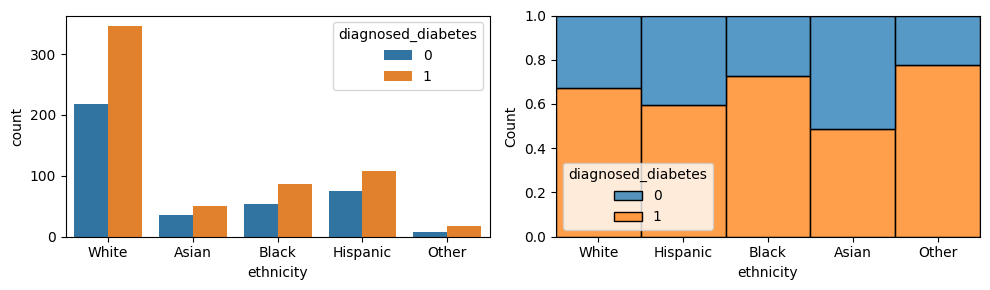

In [26]:
plot_categorical('ethnicity', df=train_df)
train_df.groupby(['ethnicity'], as_index=False)['diagnosed_diabetes'].agg(['mean', 'count'])

,education_level,mean,count
0,Graduate,0.627008,261268
1,Highschool,0.621462,344145
2,No formal,0.636066,14945
3,Postgraduate,0.616647,79642


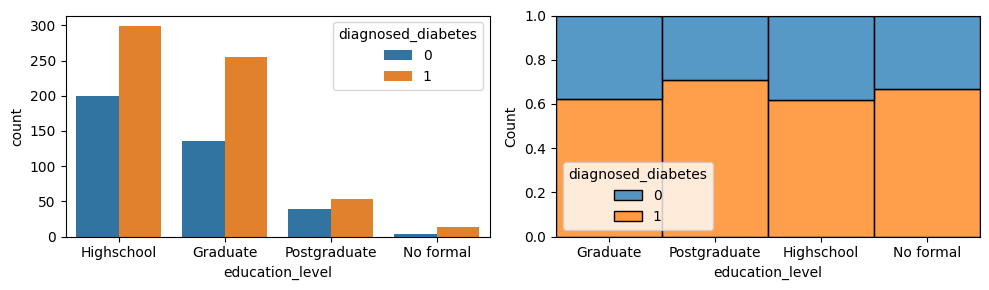

In [27]:
plot_categorical('education_level', df=train_df)
train_df.groupby(['education_level'], as_index=False)['diagnosed_diabetes'].agg(['mean', 'count'])

,income_level,mean,count
0,High,0.623593,17234
1,Low,0.630328,85803
2,Lower-Middle,0.626835,178570
3,Middle,0.620291,290557
4,Upper-Middle,0.620420,127836


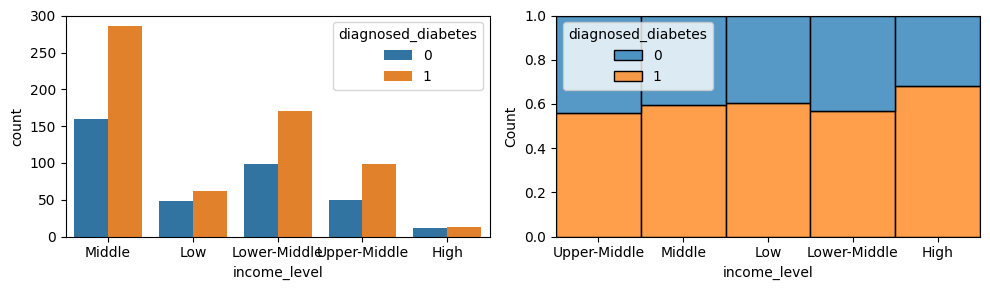

In [28]:
plot_categorical('income_level', df=train_df)
train_df.groupby(['income_level'], as_index=False)['diagnosed_diabetes'].agg(['mean', 'count'])

,smoking_status,mean,count
0,Current,0.623124,103363
1,Former,0.625331,102189
2,Never,0.622911,494448


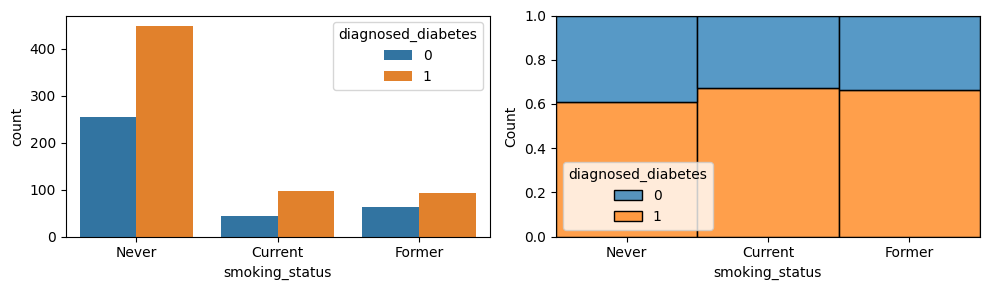

In [29]:
plot_categorical('smoking_status', df=train_df)
train_df.groupby(['smoking_status'], as_index=False)['diagnosed_diabetes'].agg(['mean', 'count'])

,employment_status,mean,count
0,Employed,0.624643,516170
1,Retired,0.618058,115735
2,Student,0.621586,18308
3,Unemployed,0.622130,49787


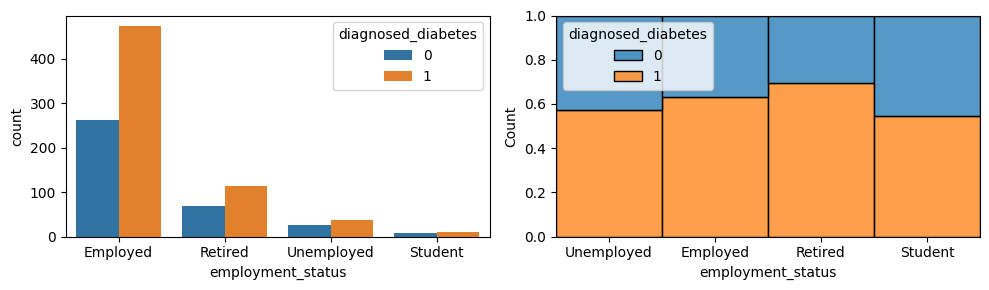

In [30]:
plot_categorical('employment_status', df=train_df)
train_df.groupby(['employment_status'], as_index=False)['diagnosed_diabetes'].agg(['mean', 'count'])

In [31]:
train_df.select_dtypes(['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 20 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [32]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
def plot_numerical(col: str, hue: str='diagnosed_diabetes', df: pd.DataFrame=train_df, sample: str | int='full', bins: int=50) -> None:
    df = train_df.copy()
    if sample != 'full':
        df = df.sample(sample)

    plt.figure(figsize=(10, 3))

    axs = plt.subplot(1, 2, 1)
    sns.kdeplot(df, x=col, hue=hue, fill=True)

    axs = plt.subplot(1, 2, 2)
    sns.histplot(df, x=col, hue=hue, multiple='fill', bins=bins)
    plt.tight_layout()


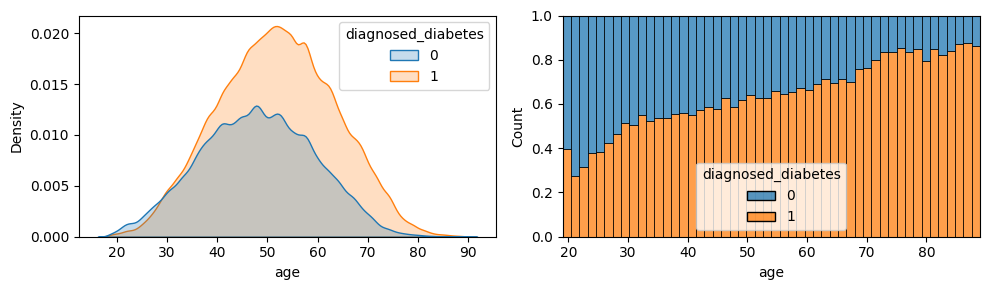

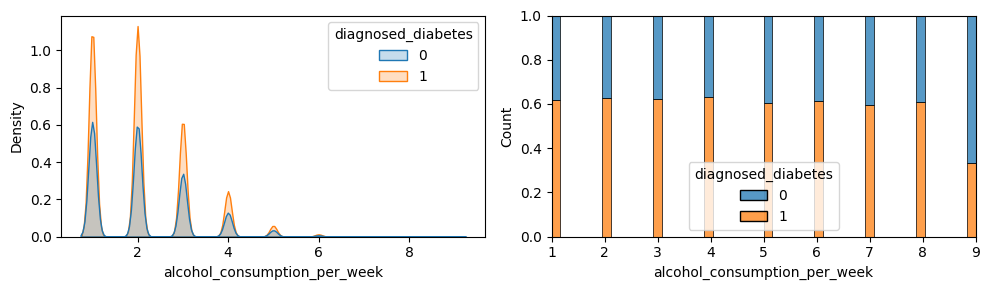

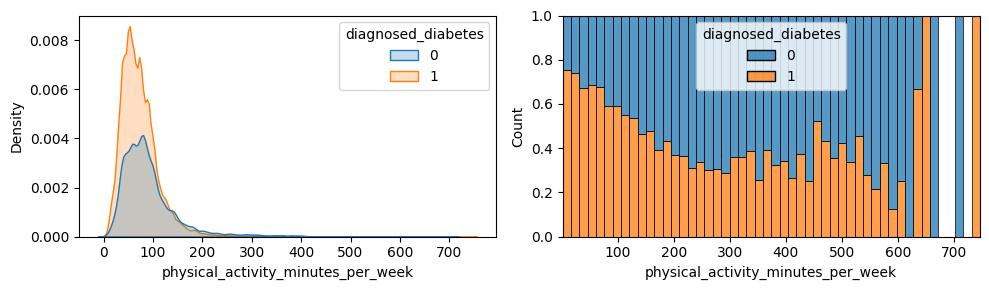

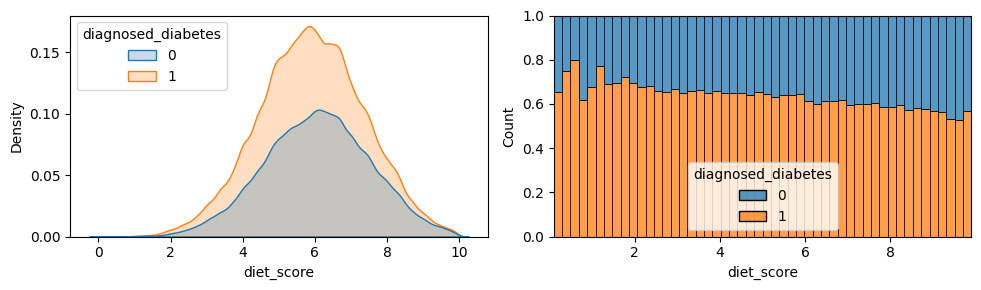

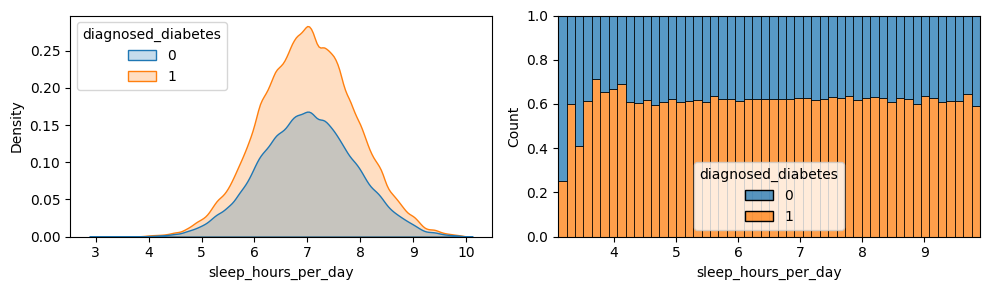

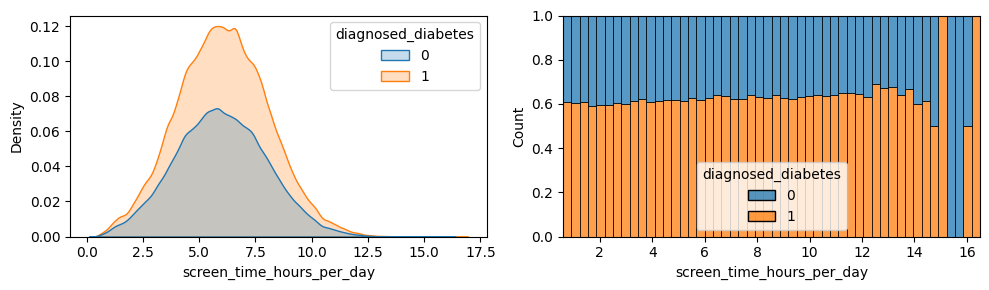

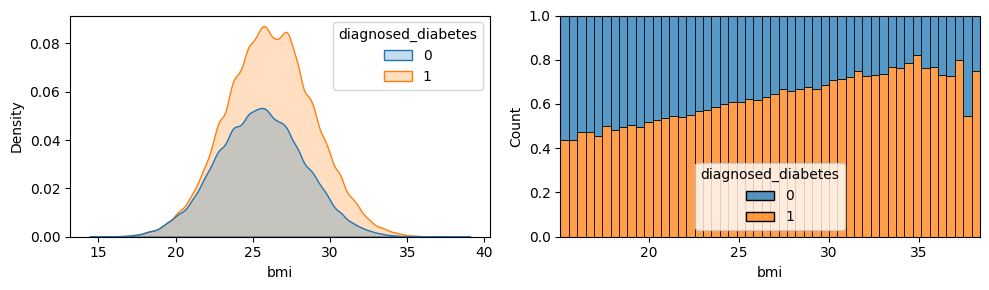

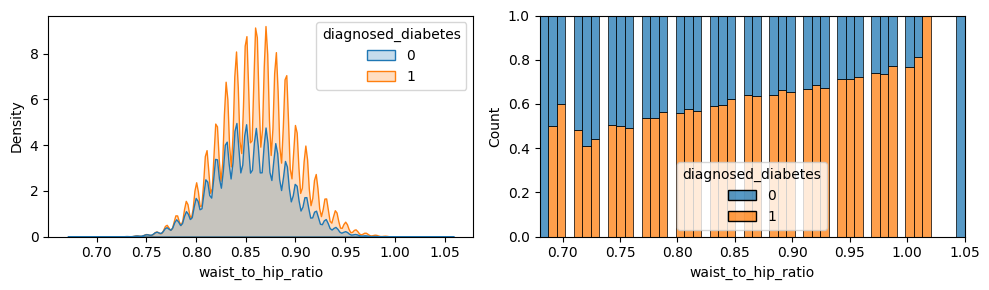

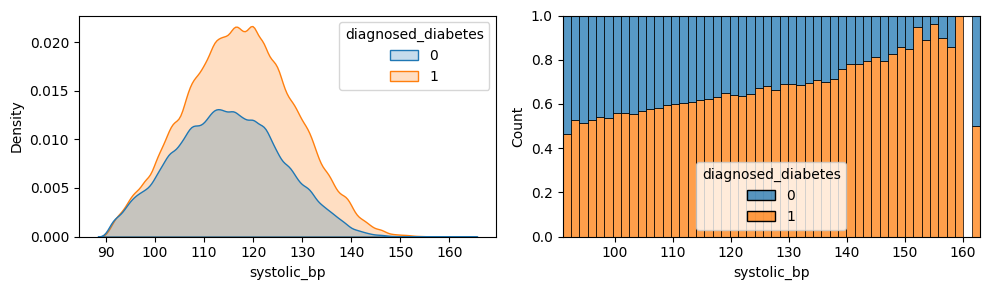

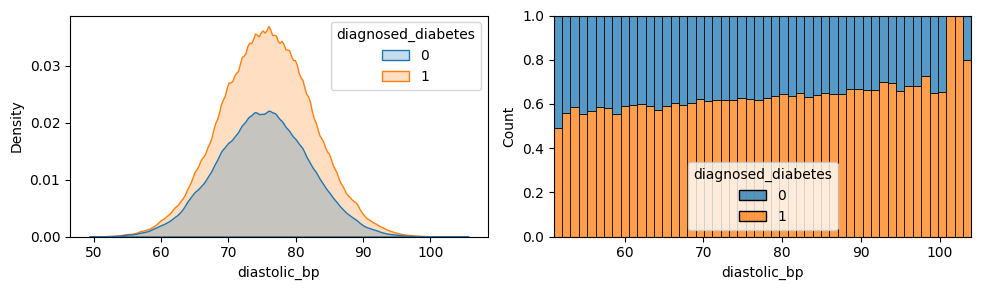

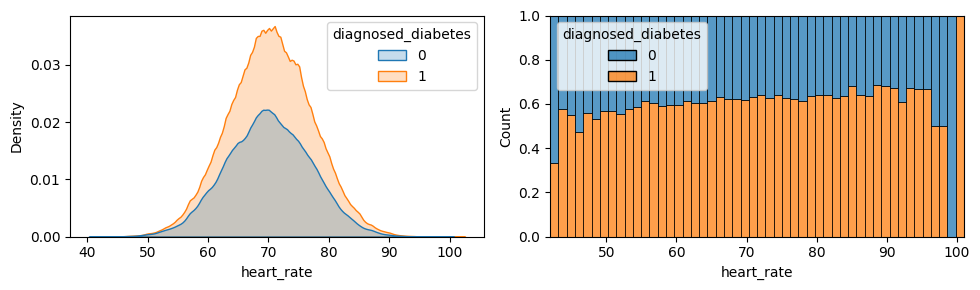

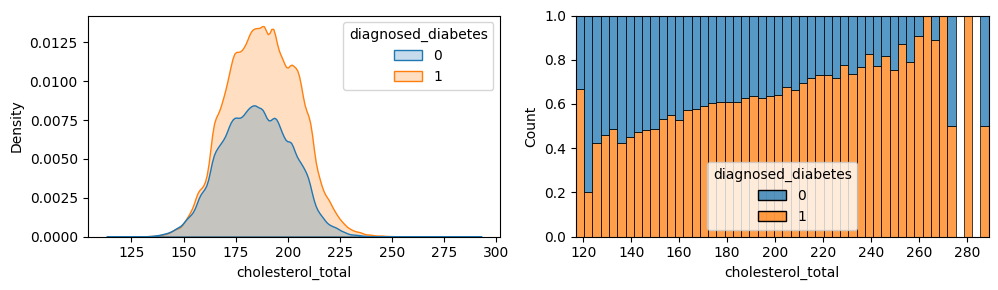

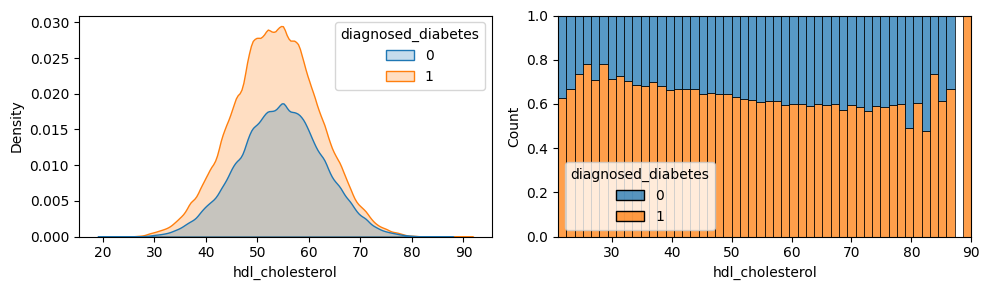

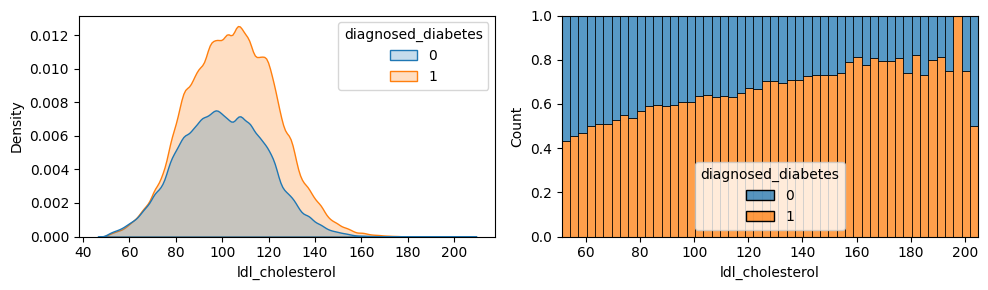

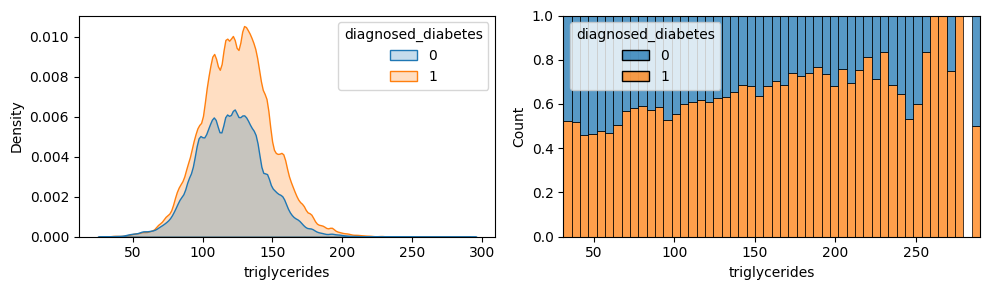

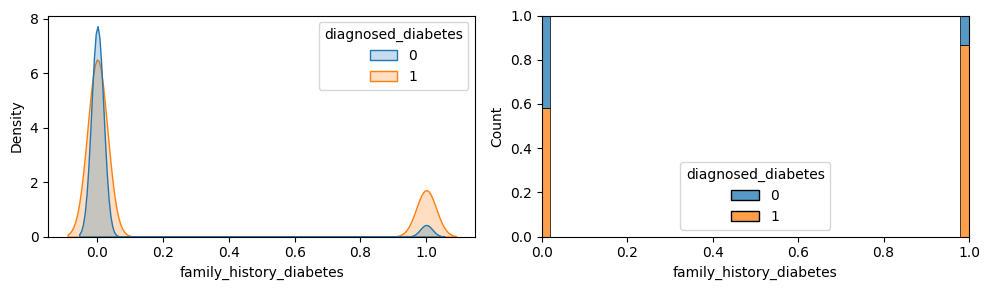

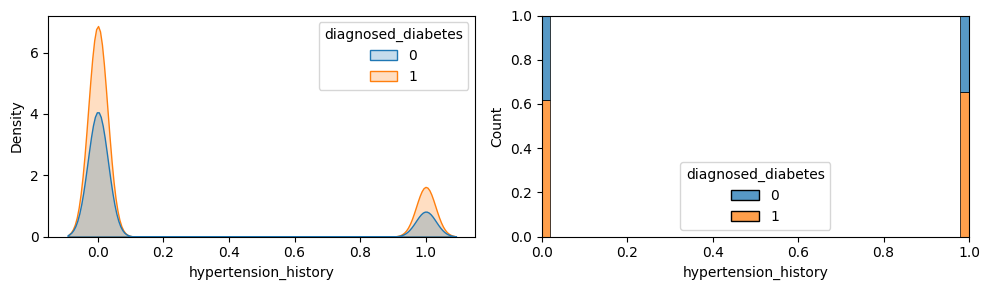

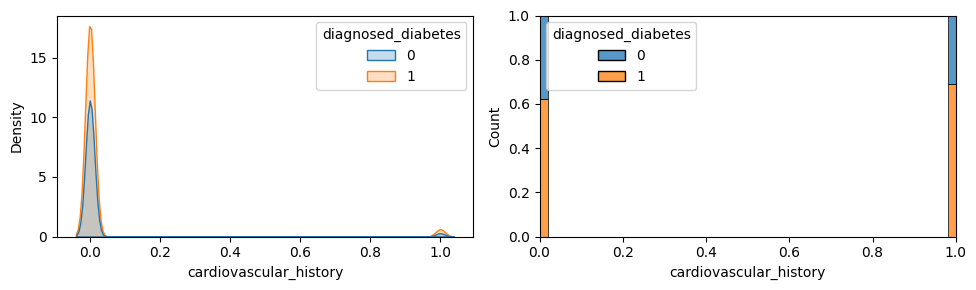

In [34]:
for column in train_df.select_dtypes(['int64', 'float64']).drop(columns=['diagnosed_diabetes', 'id']).columns:
    plot_numerical(column)

<Axes: >

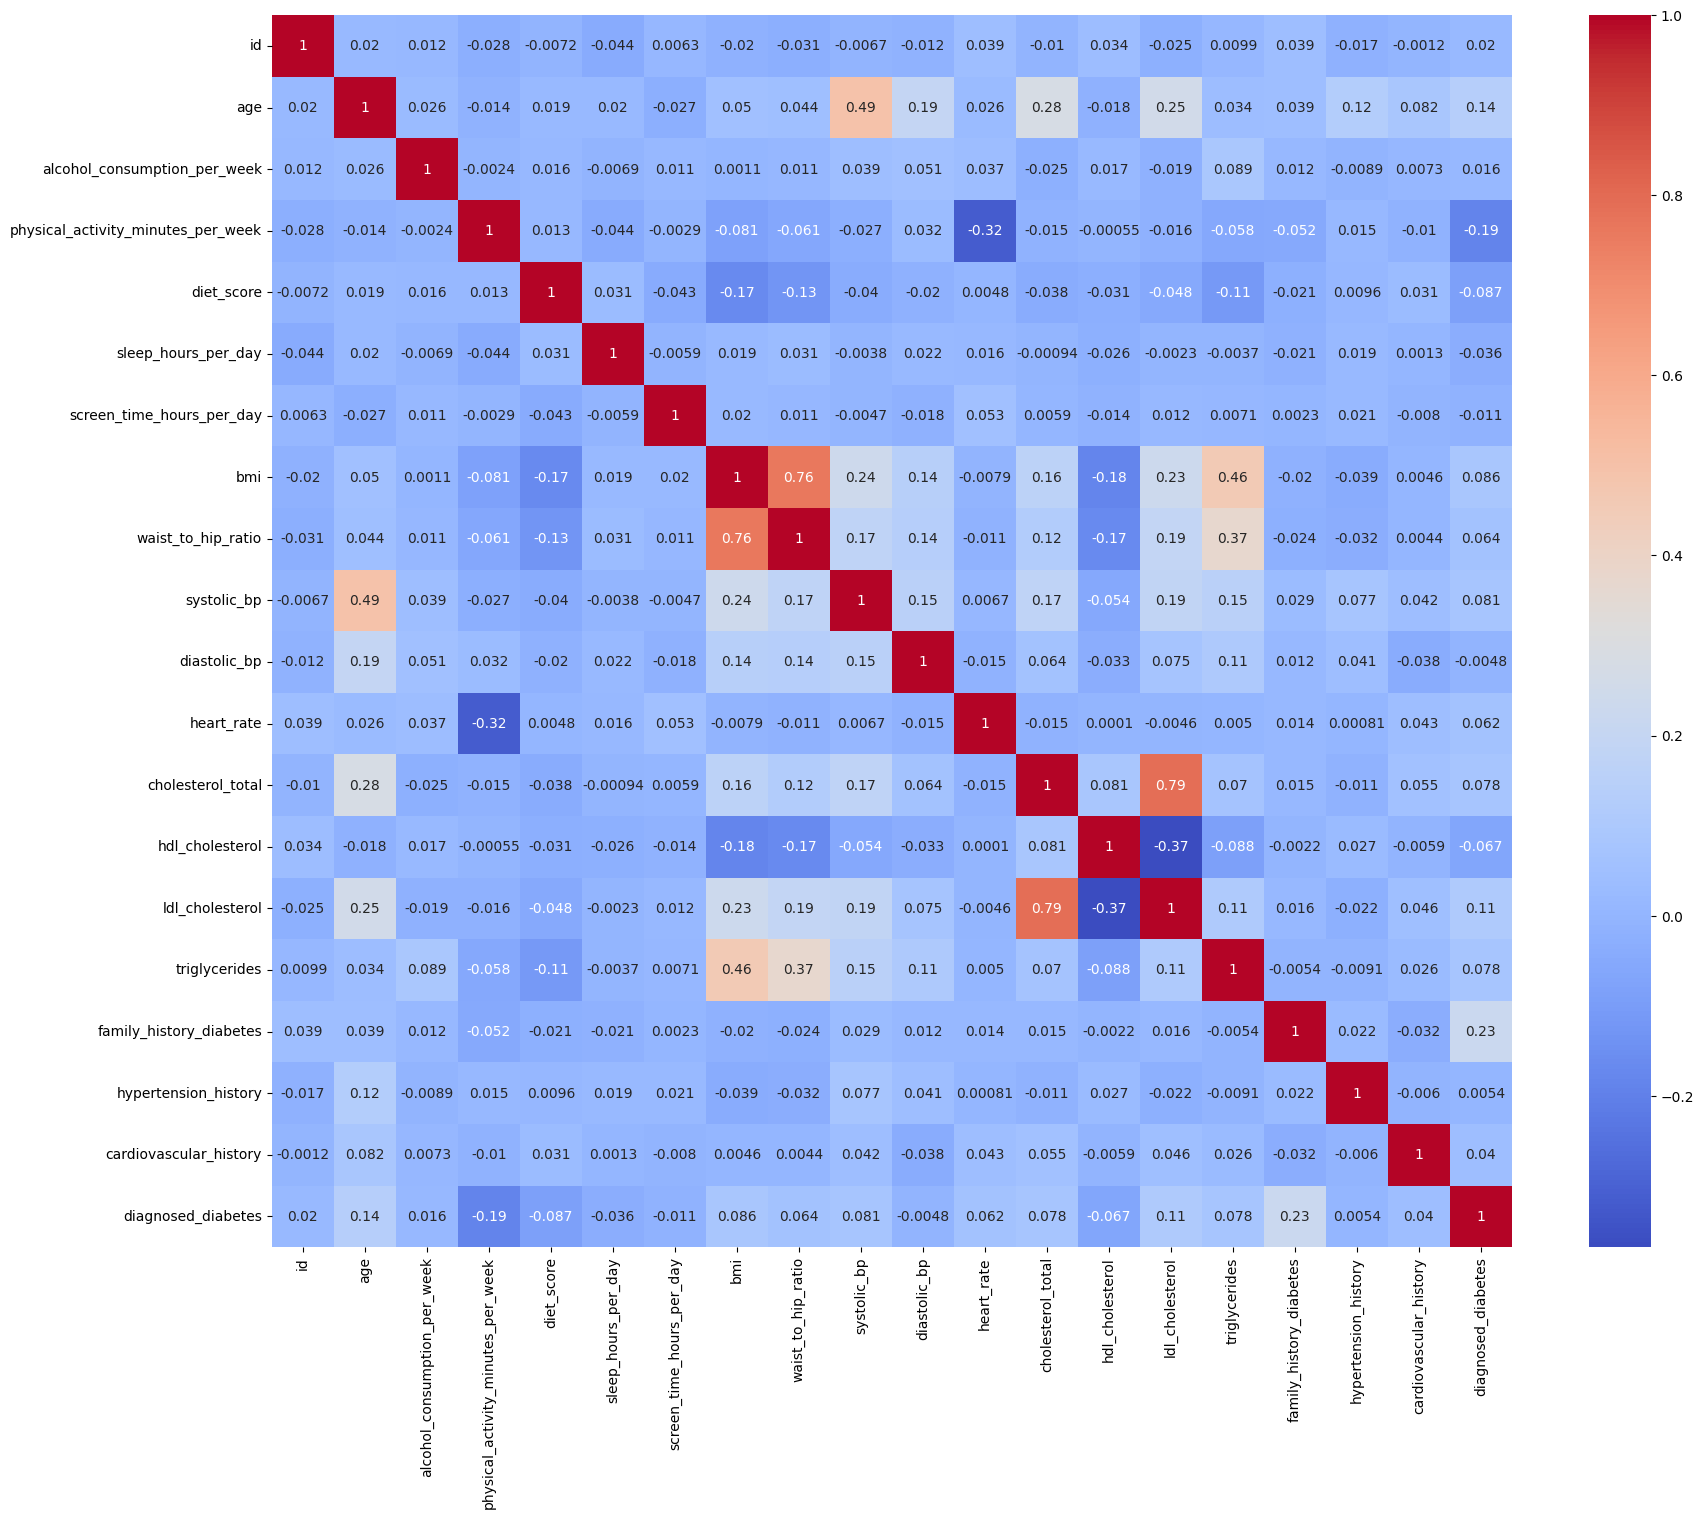

In [35]:
corr_matrix = train_df.select_dtypes(['int64', 'float64']).sample(2000).corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

<Axes: xlabel='ldl_cholesterol', ylabel='cholesterol_total'>

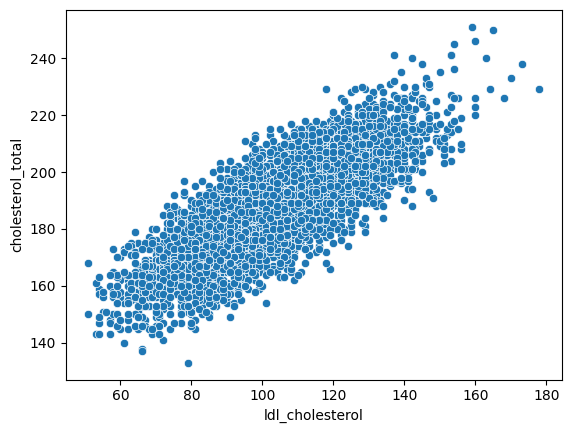

In [36]:
# ldl_cholesterol ~ cholesterol_total
# bmi ~ waist_to_hip_ratio

sns.scatterplot(train_df.sample(5000), x='ldl_cholesterol', y='cholesterol_total')

<Axes: xlabel='bmi', ylabel='waist_to_hip_ratio'>

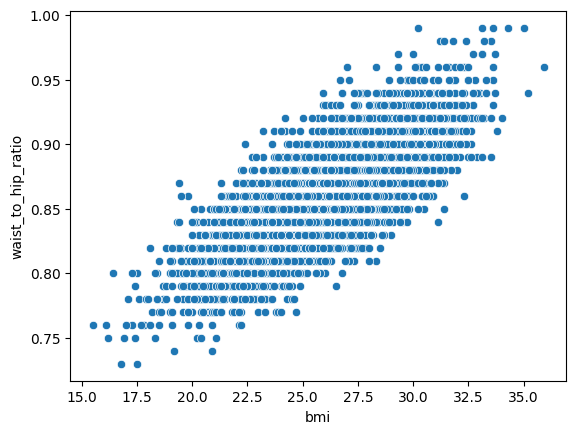

In [37]:
sns.scatterplot(train_df.sample(5000), x='bmi', y='waist_to_hip_ratio')

In [38]:
num_cols = train_df.select_dtypes(['int64', 'float64']).drop(columns=['diagnosed_diabetes', 'id']).columns

In [39]:
train_df[num_cols].head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0


In [40]:
for col in num_cols:
    print(col)

age
alcohol_consumption_per_week
physical_activity_minutes_per_week
diet_score
sleep_hours_per_day
screen_time_hours_per_day
bmi
waist_to_hip_ratio
systolic_bp
diastolic_bp
heart_rate
cholesterol_total
hdl_cholesterol
ldl_cholesterol
triglycerides
family_history_diabetes
hypertension_history
cardiovascular_history


In [41]:
train_df['TG_HDL_Ratio'] = train_df['triglycerides'] / (train_df['hdl_cholesterol'] + 1)
train_df['LDL_HDL_Ratio'] = train_df['ldl_cholesterol'] / (train_df['hdl_cholesterol'] + 1)
train_df['Non_HDL'] = train_df['cholesterol_total'] - train_df['hdl_cholesterol']

In [42]:
train_df['Pulse_Pressure'] = train_df['systolic_bp'] - train_df['diastolic_bp']
train_df['MAP'] = train_df['diastolic_bp'] + (train_df['Pulse_Pressure'] / 3)
train_df['Rate_Pressure_Product'] = train_df['systolic_bp'] * train_df['heart_rate']
train_df['Cardio_Stress_Index'] = train_df['systolic_bp'] * train_df['cholesterol_total']

In [43]:
train_df['Sleep_Deviation'] = (train_df['sleep_hours_per_day'] - 7.5).abs()

In [44]:
train_df['Activity_Screen_Ratio'] = train_df['physical_activity_minutes_per_week'] / (train_df['screen_time_hours_per_day'] * 60 + 1)
train_df['Obsesity_Index'] = train_df['bmi'] * train_df['waist_to_hip_ratio']
train_df['BMI_x_Age'] = train_df['bmi'] * train_df['age']

In [45]:
edu_map = {
    'No formal': 0,
    'Primary': 1,
    'Highschool': 2,
    'Graduate': 3,
    'Postgraduate': 4
}

inc_map = {'Low': 0, 'Lower-Middle': 1, 'Middle': 2, 'Upper-Middle': 3, 'High': 4}

train_df['Edu_score'] = train_df['education_level'].map(edu_map).fillna(1)
train_df['Inc_score'] = train_df['income_level'].map(inc_map).fillna(1)

In [46]:
train_df['SES_Score'] = train_df['Edu_score'] + train_df['Inc_score']

In [47]:
train_df['Retired_Overweight'] = ((train_df['employment_status'] == 'Retired') & (train_df['bmi'] >= 25)).astype(int)
train_df['Metabolic_Risk_Score'] = 0
train_df['Metabolic_Risk_Score'] += (train_df['bmi'] >= 30).astype(int)
train_df['Metabolic_Risk_Score'] += ((train_df['systolic_bp'] >= 130) | (train_df['diastolic_bp'] >= 85)).astype(int)
train_df['Metabolic_Risk_Score'] += (train_df['triglycerides'] >= 150).astype(int)
train_df['Metabolic_Risk_Score'] += (train_df['hdl_cholesterol'] < 45).astype(int)

In [48]:
train_df['Gender_smoking'] = train_df['gender'].astype(str) + '_' + train_df['smoking_status'].astype(str)

In [49]:
train_df.shape

(700000, 43)

In [50]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,Sleep_Deviation,Activity_Screen_Ratio,Obsesity_Index,BMI_x_Age,Edu_score,Inc_score,SES_Score,Retired_Overweight,Metabolic_Risk_Score,Gender_smoking
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,0.7,0.122616,31.062,1035.4,2,1,3,0,1,Female_Current
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,1.0,0.209169,19.754,1190.0,2,3,5,0,0,Female_Never
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,0.1,0.288848,20.003,771.2,2,1,3,0,1,Male_Never
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,0.5,0.139241,22.078,1436.4,2,1,3,0,0,Female_Current
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,1.3,0.179153,25.920,1555.2,2,3,5,1,0,Male_Never


In [51]:
corr_matrix = train_df.select_dtypes(['int64', 'float64']).drop(columns=['id']).corr()

<Axes: >

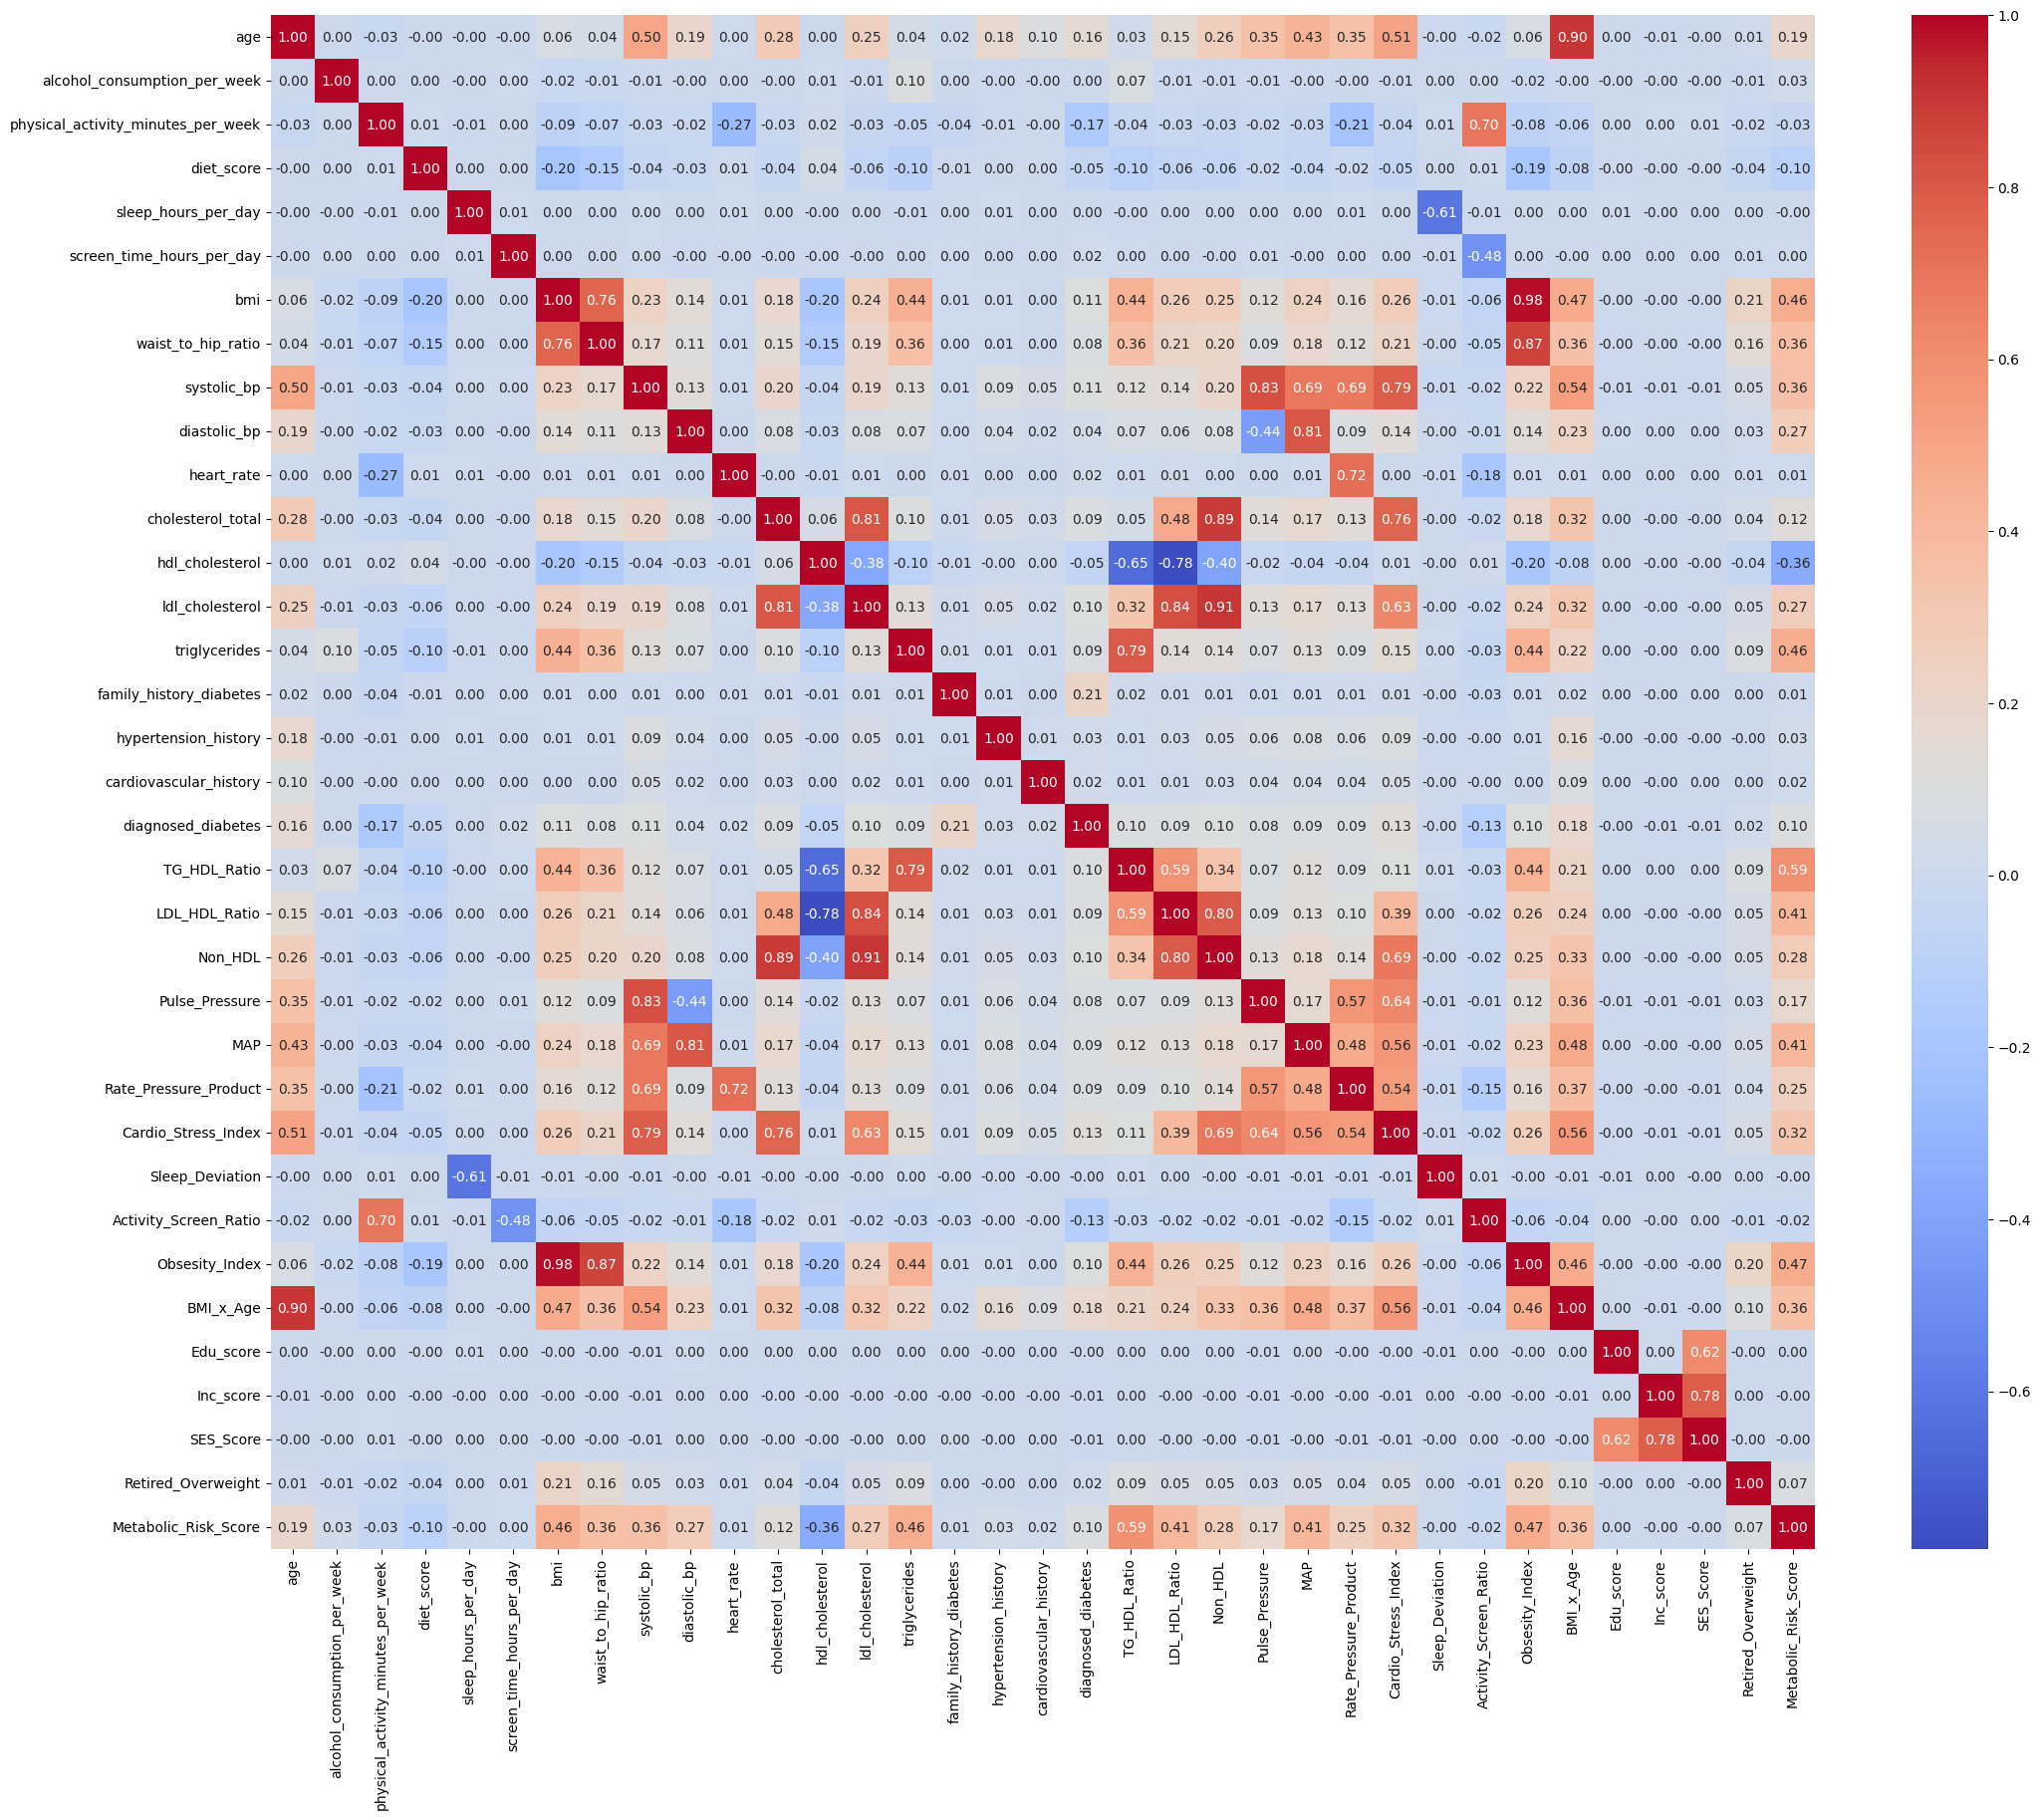

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [53]:
train_df['Metabolic_Risk_Score'].value_counts()

,count
Metabolic_Risk_Score,
0,414364
1,210136
2,59602
3,14052
4,1846


In [54]:
cat_cols = train_df.select_dtypes(['object', 'category']).columns
num_cols = train_df.select_dtypes(['int64', 'float64']).drop(columns=['id', 'diagnosed_diabetes']).columns

In [55]:
[*cat_cols, *num_cols]

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status',
 'Gender_smoking',
 'age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'TG_HDL_Ratio',
 'LDL_HDL_Ratio',
 'Non_HDL',
 'Pulse_Pressure',
 'MAP',
 'Rate_Pressure_Product',
 'Cardio_Stress_Index',
 'Sleep_Deviation',
 'Activity_Screen_Ratio',
 'Obsesity_Index',
 'BMI_x_Age',
 'Edu_score',
 'Inc_score',
 'SES_Score',
 'Retired_Overweight',
 'Metabolic_Risk_Score']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_preprocessing_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('label_encoder', OrdinalEncoder())
    ]
)

num_preprocessing_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)


column_transformer = ColumnTransformer(
    [
        ('num_pipe', num_preprocessing_pipeline, num_cols),
        ('cat_pipe', cat_preprocessing_pipeline, cat_cols)
    ],

)

In [57]:
from sklearn.model_selection import train_test_split

# X = train_df.select_dtypes(['int64', 'float64']).drop(columns=['id', 'diagnosed_diabetes'])
X = train_df[[*cat_cols, *num_cols]]
y = train_df['diagnosed_diabetes']

X_transformed = column_transformer.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=.2)

In [64]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression().fit(X_train, y_train)

In [65]:
accuracy_score(y_test, logistic_reg.predict(X_test))

0.6640357142857143

In [71]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicjalizacja modelu LightGBM - jest znacznie szybszy dla dużych zbiorów danych
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

# Trenowanie modelu
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 348929, number of negative: 211071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3903
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623088 -> initscore=0.502674
[LightGBM] [Info] Start training from score 0.502674


LGBMClassifier(n_jobs=-1, random_state=42)

In [61]:
y_pred = lgbm_model.predict(X_test)

# Ocena modelu
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

Accuracy Score: 0.6805


In [70]:
from xgboost import XGBClassifier


model = XGBClassifier(
    n_estimators=100,
    max_depth=3,        # Jak głębokie mogą być drzewa
    learning_rate=0.1,  # Jak bardzo ufamy każdemu kolejnemu drzewu
    use_label_encoder=False
)


model.fit(X_train, y_train)


predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.6712785714285714